# Exploration Notebook

## Introduction

Welcome to the Exploration Notebook. This notebook is dedicated to exploring various aspects of our project, including data gathering, processing, and analysis. We will start by examining the functionality of FITS (Flexible Image Transport System) files, which are commonly used in astronomy for storing images and other data. This notebook will serve as a sandbox for testing and validating different components of our project.

## Glossary

- **FITS (Flexible Image Transport System)**: A digital file format used to store, transmit, and manipulate scientific and other images.
- **HDU (Header Data Unit)**: The primary building block of a FITS file, consisting of a header and data unit. The header contains metadata about the data unit, such as the size, data type, and coordinate system.
- **DSS (Digitized Sky Survey)**: A collection of digitized photographic images of the night sky.
- **2MASS (Two Micron All Sky Survey)**: An astronomical survey of the whole sky in the infrared spectrum.
- **OpenCV**: An open-source computer vision and machine learning software library.
- **MAST (Mikulski Archive for Space Telescopes)**: An archive that provides access to astronomical data from various space missions.

## FITS Files Exploration

In this section, we will explore the functionality of FITS files. Specifically, we will test the following possibilities:
- Incorporating more than one image in a FITS file.
- Incorporating multiple image types (visual, blue/red wavelength, IR, etc.) in one FITS file.

### Creating a FITS File with Random Data

First, let's create a FITS file with multiple images using random data to understand the basic structure and functionality.


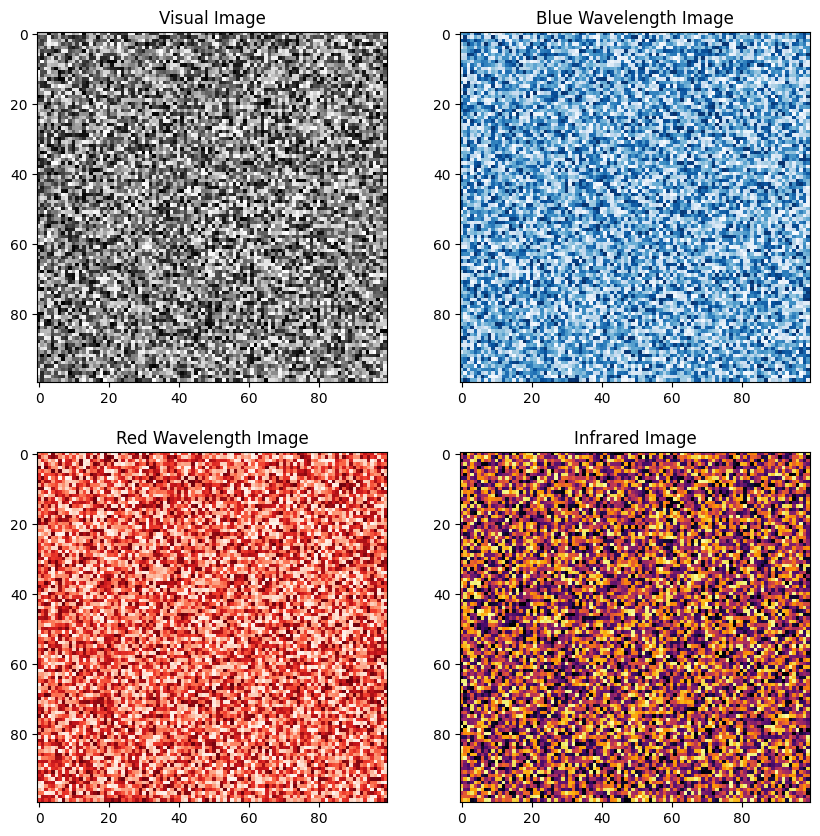

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Create sample data for different image types
visual_image = np.random.rand(100, 100)  # Visual image
blue_wavelength_image = np.random.rand(100, 100)  # Blue wavelength image
red_wavelength_image = np.random.rand(100, 100)  # Red wavelength image
ir_image = np.random.rand(100, 100)  # Infrared image

# Display the sample images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(visual_image, cmap='gray')
axs[0, 0].set_title('Visual Image')
axs[0, 1].imshow(blue_wavelength_image, cmap='Blues')
axs[0, 1].set_title('Blue Wavelength Image')
axs[1, 0].imshow(red_wavelength_image, cmap='Reds')
axs[1, 0].set_title('Red Wavelength Image')
axs[1, 1].imshow(ir_image, cmap='inferno')
axs[1, 1].set_title('Infrared Image')
plt.show()

# Create Primary HDU
primary_hdu = fits.PrimaryHDU()

# Create Image HDUs for each image type
visual_hdu = fits.ImageHDU(visual_image, name='VISUAL')
blue_hdu = fits.ImageHDU(blue_wavelength_image, name='BLUE')
red_hdu = fits.ImageHDU(red_wavelength_image, name='RED')
ir_hdu = fits.ImageHDU(ir_image, name='IR')

# Create an HDU list and write to a FITS file
hdul = fits.HDUList([primary_hdu, visual_hdu, blue_hdu, red_hdu, ir_hdu])
hdul.writeto('exploration/random_data_images.fits', overwrite=True)

### Testing the HDU and Displaying Header Info

Next, we will test the HDU and display the header information for each image.

In [2]:
# Import necessary libraries
import sys
import os
import numpy as np
import cv2
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

# Add the parent directory of the scripts folder to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

# Import the AstroImageProcessor class
from scripts.astro_image_processor import AstroImageProcessor

# Define coordinates and surveys
coordinates = SkyCoord("18h18m48s -13d49m00s", frame='icrs')
surveys = ['DSS', 'DSS1 Blue', 'DSS2 Red', 'WISE 3.4']

# Create an instance of AstroImageProcessor
processor = AstroImageProcessor(coordinates, surveys, radius=0.15)

# Fetch images
processor.fetch_images()

# Save images to a FITS file
processor.save_to_fits('exploration/eagle_nebula_images.fits')

# Load images from the FITS file
processor.load_from_fits('exploration/eagle_nebula_images.fits')

# Display FITS information
processor.display_fits_info('exploration/eagle_nebula_images.fits')

Filename: exploration/eagle_nebula_images.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  DSS           1 ImageHDU       171   (300, 300)   float32   
  2  DSS1 BLUE     1 ImageHDU       139   (300, 300)   float32   
  3  DSS2 RED      1 ImageHDU       134   (300, 300)   float32   
  4  WISE 3.4      1 ImageHDU       126   (300, 300)   float32   


In [3]:

# Display header information
processor.display_header_info()

Header information for DSS:
XTENSION = IMAGE / Image extension
BITPIX = -32 / array data type
NAXIS = 2 / number of array dimensions
NAXIS1 = 300 / 
NAXIS2 = 300 / 
PCOUNT = 0 / number of parameters
GCOUNT = 1 / number of groups
CRVAL1 = 274.7 / Reference longitude
CRVAL2 = -13.8167 / Reference latitude
RADESYS = FK5 / Coordinate system
EQUINOX = 2000.0 / Epoch of the equinox
CTYPE1 = RA---TAN / Coordinates -- projection
CTYPE2 = DEC--TAN / Coordinates -- projection
CRPIX1 = 150.5 / X reference pixel
CRPIX2 = 150.5 / Y reference pixel
CDELT1 = -0.001 / X scale
CDELT2 = 0.001 / Y scale
COMMENT =  / 
COMMENT = SkyView Survey metadata / 
COMMENT =  / 
COMMENT = Provenance:  Data taken by ROE and AAO, CalTech, Compression / 
COMMENT =                    and distribution by Space Telescope Science Instit / 
COMMENT =          ute. / 
COMMENT = Copyright:   STScI, ROE, AAO, UK-PPARC, CalTech, National Geographic S / 
COMMENT =          ociety.            Full copyright notice / 
COMMENT = Re

### Fetching Images from Different Surveys
Next, we will fetch images from different surveys using the SkyView.get_images function from the astroquery library.

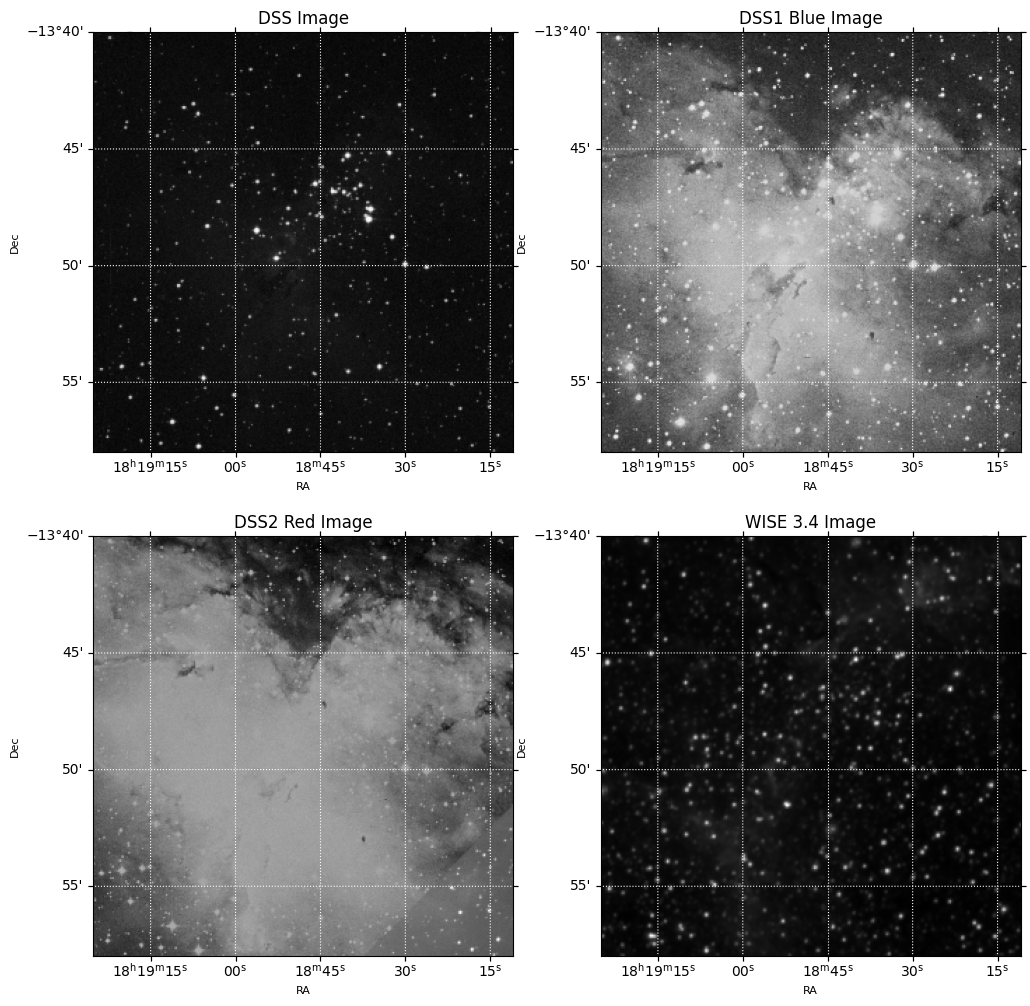

In [4]:
processor.display_images()

### Summary

In this section, we have successfully:
- Created a FITS file with multiple images using random data.
- Fetched images from different surveys using the `SkyView.get_images` function.
- Incorporated more than one image in a FITS file.
- Incorporated multiple image types (visual, blue/red wavelength, IR, etc.) in one FITS file.
- Read and displayed the images from the FITS file to verify the functionality.

By using FITS files, we can efficiently store and manage multiple types of astronomical images in a single file, making it easier to handle and analyze the data.

---

Implementing Testing of the HDU and Displaying Header Info
Let's add a section in the notebook to test the HDU and display the header information. We will also create a method in the AstroImageProcessor class to extract and display header information.

1. Update the AstroImageProcessor Class
Add a method to extract and display header information.

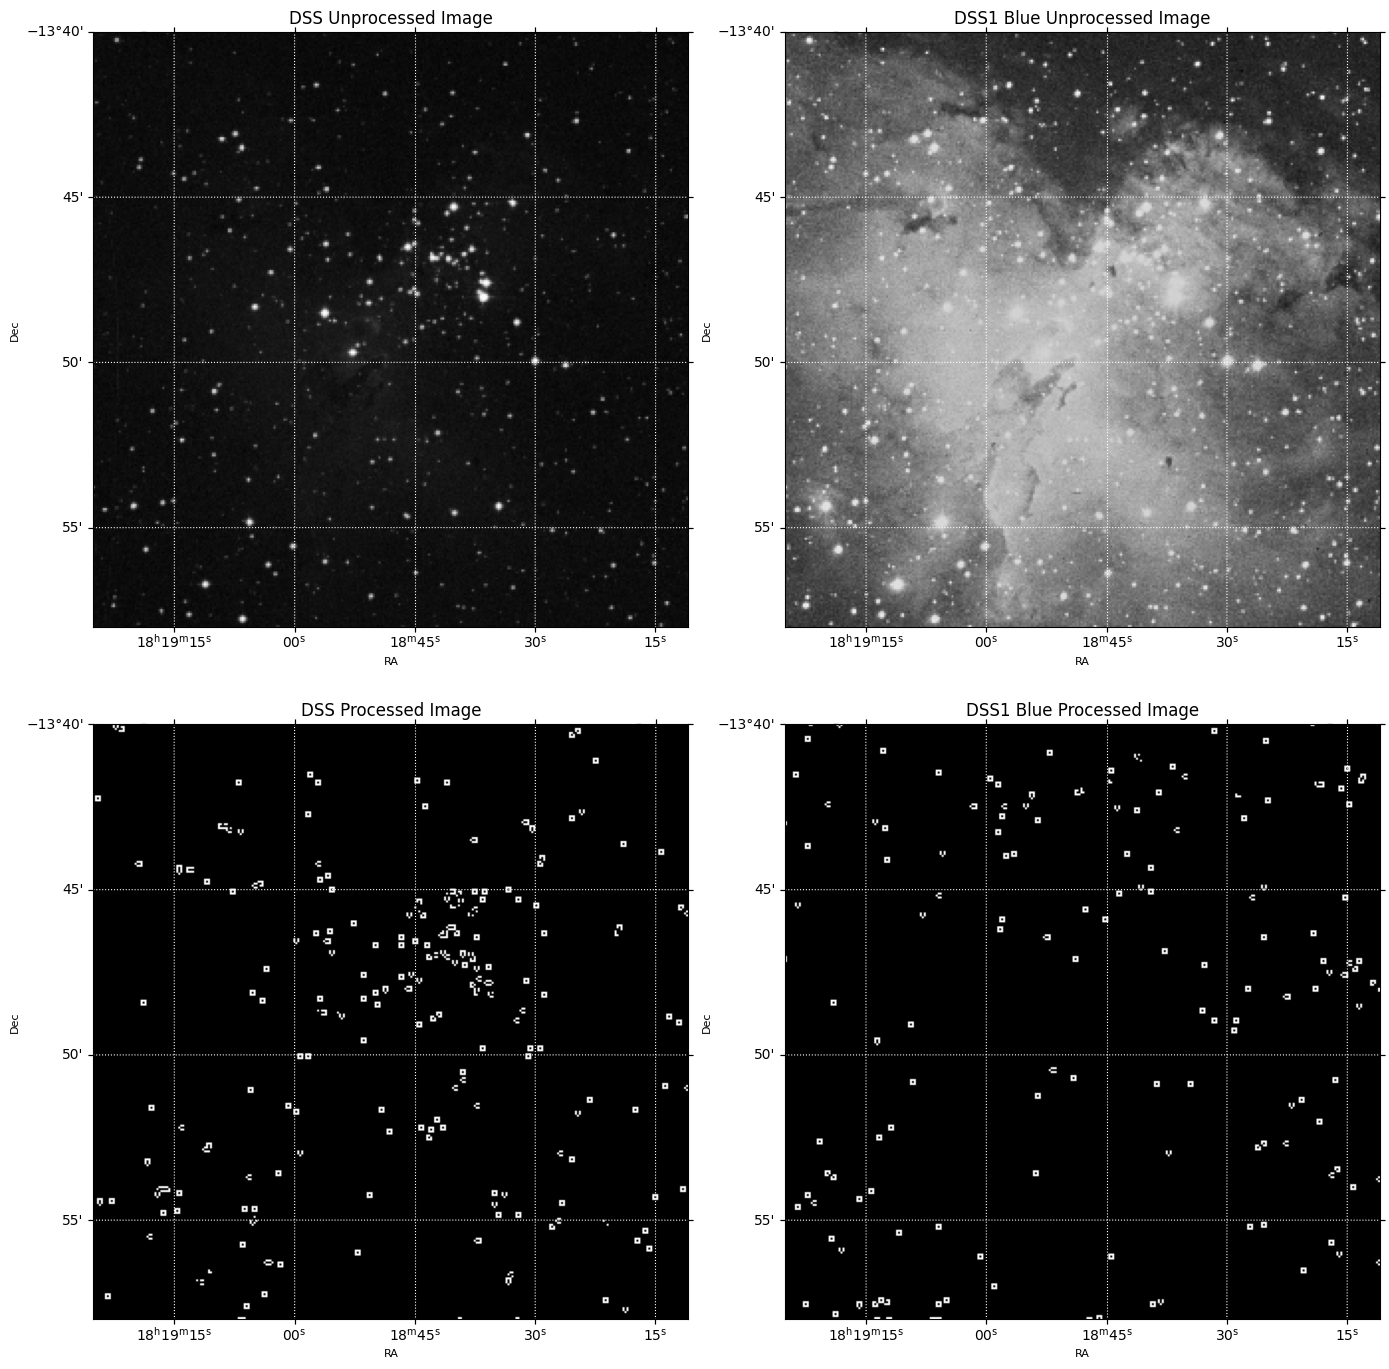

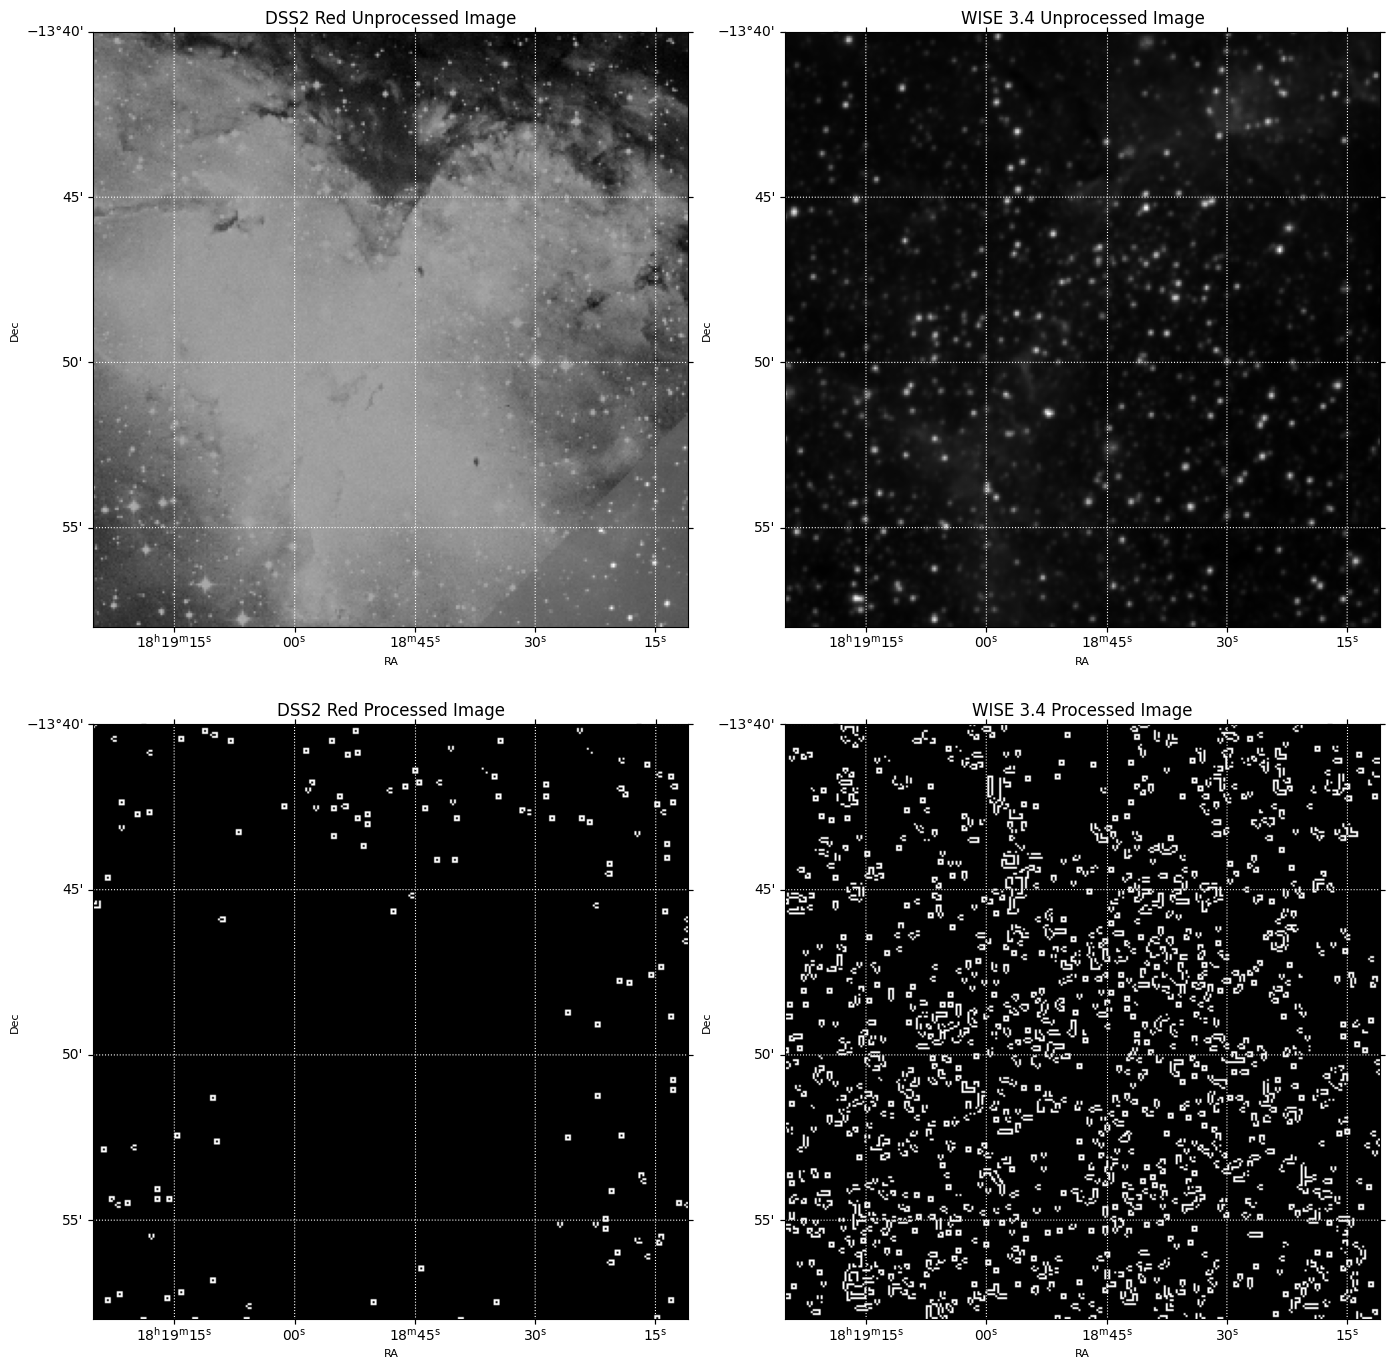

In [8]:
# Example usage with the processor object
processed_images = processor.process_with_opencv(blur_ksize=(1, 1), block_size=5, C=1, canny_thresh1=100, canny_thresh2=200,iterations=1)

# Display processed images
processor.display_unprocessed_and_processed_images(processor.images, processed_images)